ASSIGNMENT 04:

In [6]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Here  we are importing all the required libraries  for our program.

In [7]:
df=pd.read_excel("C:\\Users\\joshi\\Downloads\\archive (1)\\Traing_Data_analysis.xlsx")
A=df.iloc[:,3]
print(A)
vector_space = A.shape[0]
print(vector_space)
#df['Results'] = np.where(df['grade'] > mean_grade, 1,0)
#print(df.iloc[:,6])

0       1.0
1       1.0
2       1.0
3       1.0
4       0.7
       ... 
1795    1.0
1796    1.0
1797    0.9
1798    1.0
1799    1.0
Name: grade, Length: 1800, dtype: float64
1800


In [8]:
mean0fgrade = df['grade'].mean()
class1_feat_vecs = np.array([])
class2_feat_vecs = np.array([])
 
# Create a new column in df based on the condition
df['results'] = np.where(df['grade'] > mean0fgrade, 1, 0)
 
# Append values to class1_feat_vecs and class2_feat_vecs based on the new column
class1_feat_vecs = np.append(class1_feat_vecs, df[df['results'] == 1]['grade'].values)
class2_feat_vecs = np.append(class2_feat_vecs, df[df['results'] == 0]['grade'].values)
 
centroid1 = class1_feat_vecs.mean(axis=0)
centroid2 = class2_feat_vecs.mean(axis=0)
 
# Calculate the spread (standard deviation) for each class
spread1 = class1_feat_vecs.std(axis=0)
spread2 = class2_feat_vecs.std(axis=0)
 
# Calculate the distance between the centroids of the two classes
interclass_distance = np.linalg.norm(centroid1 - centroid2)
 
print(f"Centroid of Class 1: {centroid1}, Spread: {spread1}")
print(f"Centroid of Class 2: {centroid2}, Spread: {spread2}")
print(f"Interclass Distance: {interclass_distance}")
result = df['results'] 
grade=df['grade'] 

Centroid of Class 1: 0.9767086330935251, Spread: 0.04226877001138608
Centroid of Class 2: 0.600436046511628, Spread: 0.18493347792865555
Interclass Distance: 0.3762725865818971


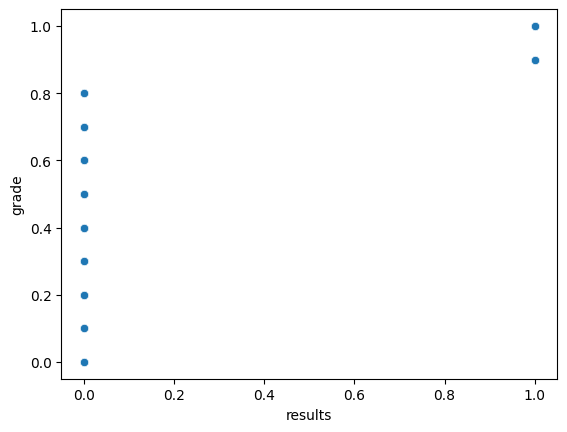

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot of 'Chg%' data against the day of the week
sns.scatterplot(x=result, y='grade', data=df)

# Display the plot
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test=train_test_split(grade,result,test_size=0.3)
knn=KNeighborsClassifier(n_neighbors=3)
import numpy as np

# Assuming grade is a numpy array
grade_reshaped = grade.to_numpy().reshape(-1, 1)

# Now use grade_reshaped in the fit method
knn.fit(grade_reshaped, result)
# Reshape X_test to a 2D array
X_test_reshaped = X_test.to_numpy().reshape(-1, 1)

# Now use X_test_reshaped in the score method
print(knn.score(X_test_reshaped, y_test))# score of knn predictor
knn.predict(X_test_reshaped)# prediction
#Training data
X_train1=np.reshape(X_train,(-1,1))
Y_train1=np.reshape(y_train,(-1,1))

#Testing data
X_test1=np.reshape(X_test,(-1,1))
Y_test1=np.reshape(y_test,(-1,1))

1.0


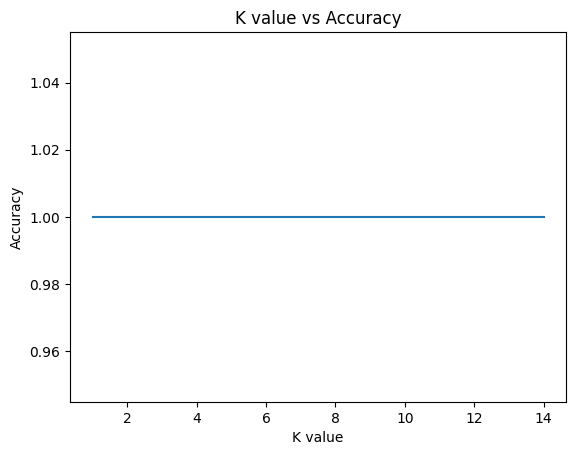

In [11]:
accuracy= []
for i in range(1,15):# checking the accuracies upto k=15
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(grade_reshaped, result)
    accuracy.append(knn.score(X_test_reshaped, y_test))

plt.plot(range(1,15),accuracy)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K value vs Accuracy')
plt.show()

A9. Please evaluate confusion matrix for your classification problem. From confusion matrix, the other performance metrics such as precision, recall and F1-Score measures for both training and test data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

#model prediction
train_predictions = knn.predict(X_train1)
test_predictions = knn.predict(X_test1)

#Training data confusion matrix
train_conf_matrix = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix for Training Data:")
print(train_conf_matrix)

#Testing data confusion matrix
test_conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix for Test Data:")
print(test_conf_matrix)

#precision
train_precision = precision_score(y_train, train_predictions, average=None)
print("Precision for Training Data:", train_precision)
test_precision = precision_score(y_test, test_predictions, average=None)
print("Precision for Test Data:", test_precision)

#Recall
train_recall = recall_score(y_train, train_predictions, average=None)
print("Recall for Training Data:", train_recall)
test_recall = recall_score(y_test, test_predictions, average=None)
print("Recall for Test Data:", test_recall)

#f1 score
train_f1 = f1_score(y_train, train_predictions, average=None)
print("F1-score for Training Data:", train_f1)
test_f1 = f1_score(y_test, test_predictions, average=None)
print("F1-score for Test Data:", test_f1)

Confusion Matrix for Training Data:
[[484   0]
 [  0 776]]
Confusion Matrix for Test Data:
[[204   0]
 [  0 336]]
Precision for Training Data: [1. 1.]
Precision for Test Data: [1. 1.]
Recall for Training Data: [1. 1.]
Recall for Test Data: [1. 1.]
F1-score for Training Data: [1. 1.]
F1-score for Test Data: [1. 1.]
